<a href="https://colab.research.google.com/github/MatheusABomfim/Qualifica-o_ML_HTLV/blob/Under-sampling/MEST_HTLV%2BMBL2%2BCLINICAL_PreProcessing_and_defaultML_Avaliation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Notes/reminders:**

* Clinical data has been excluded
(because they will still be extracted from the medical records, classifying the oligosymptomatic patients separately, allowing a better evaluation of the machine)

* This script is based on the file: "Based on the ML Wine data set" with the appropriate modifications.

* It uses only one machine-learning evaluation model, several of which will be used in the final master's work. The current script corresponds to a training script developed in conjunction with pacific (more complex).

## Dictionary:
* In column: SEX
 * M = 0
 * F = 1

* In column: HAM/TSP
* No myelopathy = 0
* HAM/TSP = 1

# **Categorized data_1:**
named as = cat_data_1

Creation of a new data table, transforming the binary variables referring to urinary dysfunctions into categorical numerical variables, exclusion of uninformative columns and categorization of pain subtypes. Including the conversion of "Hipereflexia" and "Hiperflexia em MMII", como somente "Hipereflexia.

Dictionary:
- Urinary_symptoms:
 - Polyuria: 1 +
 - Neurogenic bladder: 2 +
 - Neurogenic bladder + urinary incontinence:3
 - Nocturia: 4 +
 - Nocturia + urinary incontinence: 5
 - Dysuria: 6
 - Dysuria + neurogenic bladder: 7

- Pain:
 - non-specific pain: 1
 - joint pain: 2
 - lower back pain: 3
 - lower limb pain: 4
 - lower limb pain + other site of pain: 5

- Weakenes:
 - normal levels of strength: 0
 - weakness or lost of stregth: 1

- Wandering:
 - normal walking: 0
 - abnormal walking: 1

At this point, df is the new data set with the change in the selected characteristics

# **Categorized data_2:**
named as = cat_data_2

- Urinary_symptoms:
 - Polyuria: 1 +
 - Neurogenic bladder: 2 +
 - Neurogenic bladder + urinary incontinence:3
 - Nocturia: 4 +
 - Nocturia + urinary incontinence: 5
 - Dysuria: 6
 - Dysuria + neurogenic bladder: 7

- Pain:
 - non-specific pain: 1
 - joint pain: 2
 - lower back pain: 3
 - lower limb pain: 4
 - lower limb pain + other site of pain: 5

- Weakenes:
 - normal levels of strength: 0
 - weakness or lost of stregth: 1

- Wandering:
 - normal walking: 0
 - abnormal walking: 1

- Chronic diseases:

The presence of any of the following variables resulted in the dataset being converted to 1:
 - diabetes
 - obesity
 - diabetes
 - osteoporosis
 - chronic kidney disease
 - Hypothyroidism
 - arthrosis
 - hypertension
 - arthrosis/ diabetes/hypertension
 - arthrosis/diabetes/hypertension

- Mental disorders:
The presence of any of the following variables resulted in the dataset being converted to 1:
 - psychotic breaks/compulsive crises
 - insomnia
 - outbreaks/insomnia/crisis
 - schizophrenia
 - anxiety
 - psychiatric illness
 - anxiety/depression
 - depression


- Neurological disorder/symptoms:
The presence of any of the following variables resulted in the dataset being converted to 1:
 - Paresthesia
 - Weakness
 - Numbness
 - Hypermotility

- The presence of any of the following variables resulted in the dataset being converted to 2:
 - Paresis
 - Hypereflexia
 - Spasticity
 - Gait (related to locomotion problems)

In the event of the presence of the above-mentioned symptoms associated with the disorders, the sample was converted into 2


#**Categorized data_3:**
named as = cat_data_3

- Urinary_symptoms:
 - Polyuria: 1 +
 - Neurogenic bladder: 2 +
 - Neurogenic bladder + urinary incontinence:3
 - Nocturia: 4 +
 - Nocturia + urinary incontinence: 5
 - Dysuria: 6
 - Dysuria + neurogenic bladder: 7

- Pain:
 - non-specific pain: 1
 - joint pain: 2
 - lower back pain: 3
 - lower limb pain: 4
 - lower limb pain + other site of pain: 5

- Weakenes:
 - normal levels of strength: 0
 - weakness or lost of stregth: 1

- Wandering:
 - normal walking: 0
 - abnormal walking: 1
Use of a wheelchair included difficulty walking


- Mental disorders:
The presence of any of the following variables caused the data set to be converted into the respective numbers described below:
 - psychotic breaks/compulsive crises: 1
 - insomnia: 2
 - outbreak/insomnia/crisis: 3
 - schizophrenia: 4
 - anxiety: 5
 - psychiatric illness: 6
 - anxiety/depression: 7
 - depression : 8





In [ ]:
# Att Scikit-learn
!pip install scikit-learn==1.0.2
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.5.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
# Import data and packages for work:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score,roc_curve, auc, make_scorer, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.datasets import make_classification
import pandas as pd
from scipy.stats import skew, kurtosis
import shutil
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import learning_curve, train_test_split, StratifiedShuffleSplit
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from ipywidgets import interact, widgets

# Data selection
inicial_dataset = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets and Models/Clean_data_HAM_TSP.csv')
cat_data_1 = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets and Models/df_cat.csv')
cat_data_2 = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets and Models/df_cat_2.csv')
cat_data_3 = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets and Models/df_cat_3.csv')

# Ignoring flags
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.columns

Index(['Sexo', 'HAM/TSP', 'MBL-550', 'MBL -221', 'MBL EXON',
       'Sintomas urinários', 'Idade', 'Dor', 'parestesia', 'Paresia',
       'Hipereflexia', 'dificuldade de deambular',
       'Espasticidade ou marcha espástica', 'Perda de força e fraqueza',
       'Hipertensão', 'artrose', 'Neuropatia', 'Insônia', 'Cadeirante',
       'Diabetes', 'Depressão '],
      dtype='object')

# Importing and processing data:

In [ ]:
# Definindo variável global para armazenar o DataFrame
df = pd.DataFrame()

# Função para carregar e processar o conjunto de dados selecionado
def load_and_process_data(selected_data):
    global df
    if selected_data == 'Initial Dataset':
        df = pd.read_table(inicial_dataset, sep='.')  # Suponha que o nome do arquivo seja 'Clean_data_HAM_TSP'
    elif selected_data == 'Categorical Data 1':
        df = pd.read_table(cat_data_1, sep=',')  # Substitua 'cat_data_1' pelo nome do seu arquivo de dados
        df['Sexo'] = df['Sexo'].replace('M', 0)
        df['Sexo'] = df['Sexo'].replace('F', 1)
        df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO', 0)
        df['HAM/TSP'] = df['HAM/TSP'].replace('SIM', 1)
        # Eliminação de dados que estão inconsistentes:
        df = df[df['HAM/TSP'].isin([1, 0])]

        # Transformação de dados de string em float64:
        df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'], errors='coerce')

    elif selected_data == 'Categorical Data 2':
        df = pd.read_table(cat_data_2, sep=',')  # Substitua 'cat_data_2' pelo nome do seu arquivo de dados
        df = df.rename(columns={'SEXO':'Sexo'})
        df['Sexo'] = df['Sexo'].replace('M', 0)
        df['Sexo'] = df['Sexo'].replace('F', 1)
        df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO', 0)
        df['HAM/TSP'] = df['HAM/TSP'].replace('SIM', 1)
        # Exclusão de colunas que não serão utilizadas:
        df = df.drop(['REGISTRO', 'NUM AMO'], axis=1)

        # Transformação de dados de string em float64:
        df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'], errors='coerce')

    elif selected_data == 'Categorical Data 3':
        df = pd.read_table(cat_data_3, sep=',')  # Substitua 'cat_data_3' pelo nome do seu arquivo de dados
        df = df.rename(columns={'SEXO':'Sexo'})
        df['Sexo'] = df['Sexo'].replace('M', 0)
        df['Sexo'] = df['Sexo'].replace('F', 1)
        df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO', 0)
        df['HAM/TSP'] = df['HAM/TSP'].replace('SIM', 1)
        # Exclusão de colunas que não serão utilizadas:
        df = df.drop(['REGISTRO', 'NUM AMO'], axis=1)

        # Transformação de dados de string em float64:
        df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'], errors='coerce')

    else:
        df = pd.DataFrame()  # DataFrame vazio caso nenhuma opção seja selecionada

    # Transformações de dados para o conjunto inicial
    if selected_data == 'Initial Dataset':
        # Transformação de dados nominais categóricos em dados numéricos categóricos:
        df['SEXO'] = df['SEXO'].replace('M', 0)
        df['SEXO'] = df['SEXO'].replace('F', 1)
        df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO', 0)
        df['HAM/TSP'] = df['HAM/TSP'].replace('SIM', 1)

        # Eliminação de dados que estão inconsistentes:
        df = df[df['HAM/TSP'].isin([1, 0])]

        # Exclusão de colunas que não serão utilizadas:
        df = df.drop(['SINTOMAS', 'SINT. DET.', 'ANO DE DIAGNOSTICO', 'REGISTRO', 'NUM AMO', 'Baixo fluxo urinário', 'Câimbras', 'Edema MMSS'], axis=1)

        # Transformação de dados de string em float64:
        df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'], errors='coerce')

        # Remoção de linhas com valores nulos:
        df = df.dropna()

        df = df.rename(columns={'parestesia':'Parestesia'})
        df = df.rename(columns={'dificuldade de deambular':'Dificuldade de deambular'})
        df = df.rename(columns={'artrose':'Artrose'})
        df = df.rename(columns={'Espasticidade ou marcha espástica':'Espasticidade'})
        df = df.rename(columns={'Perda de força e fraqueza':'Fraqueza'})
        df = df.rename(columns={'Dificuldade de deambular':'Deambulação'})
        df = df.rename(columns={'Idade 2018 (2019 AZUL)':'Idade'})
        df = df.rename(columns={'SEXO':'Sexo'})

    print("Data Loaded and Processed Successfully!")
    return df.head()  # Mostra as primeiras linhas do conjunto de dados carregado e processado

# Lista de opções de conjuntos de dados
data_options = ['Initial Dataset', 'Categorical Data 1', 'Categorical Data 2', 'Categorical Data 3']

# Widget de seleção para escolher o conjunto de dados
data_selector = widgets.Dropdown(
    options=data_options,
    description='Select Data:'
)

# Função interativa para carregar e processar o conjunto de dados selecionado
@interact(selected_data=data_selector)
def load_and_process_selected_data(selected_data):
    return load_and_process_data(selected_data)


interactive(children=(Dropdown(description='Select Data:', options=('Initial Dataset', 'Categorical Data 1', '…

In [ ]:
# Função para visualizar o DataFrame ou suas colunas
def check_dataframe_or_columns(df, view_type):
    if view_type == 'DataFrame':
        print("DataFrame:")
        print(df)
    elif view_type == 'Columns':
        print("Columns:")
        print(df.columns)

# Lista de opções de visualização
view_options = ['DataFrame', 'Columns']

# Widget de seleção para escolher o tipo de visualização
view_selector = widgets.Dropdown(
    options=view_options,
    description='View Type:'
)

# Função interativa para verificar o DataFrame ou suas colunas
@interact(view_type=view_selector)
def check_dataframe_or_columns_selected(view_type):
    if view_type == 'DataFrame':
        check_dataframe_or_columns(df, 'DataFrame')
    elif view_type == 'Columns':
        check_dataframe_or_columns(df, 'Columns')


interactive(children=(Dropdown(description='View Type:', options=('DataFrame', 'Columns'), value='DataFrame'),…

In [ ]:
#df.columns
print(df)

# **Exploratory analysis**


Target frequency distribution (HAM/TSP)

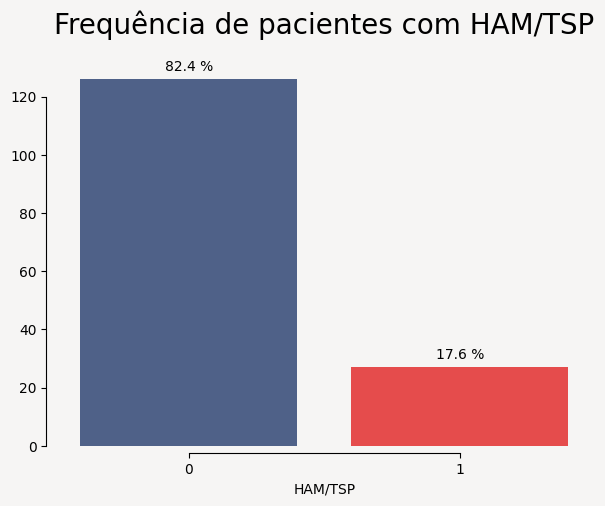

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Color palette
mypal = ['#465d91', '#FFFFE0', '#FF3232']

# Bar Graph for Distribution of Variables
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HAM/TSP'], palette=mypal[0::2])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center")

ax.set_title('Frequência de pacientes com HAM/TSP', fontsize=20, y=1.05)
ax.set_ylabel('')
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Save the graphic in JPEG
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Exploratory Analysis/' + 'Frequência_HAM_TSP.jpeg')

# Show the graphic
plt.show()

Pearson correlation matrix initial dataset (heatmap):

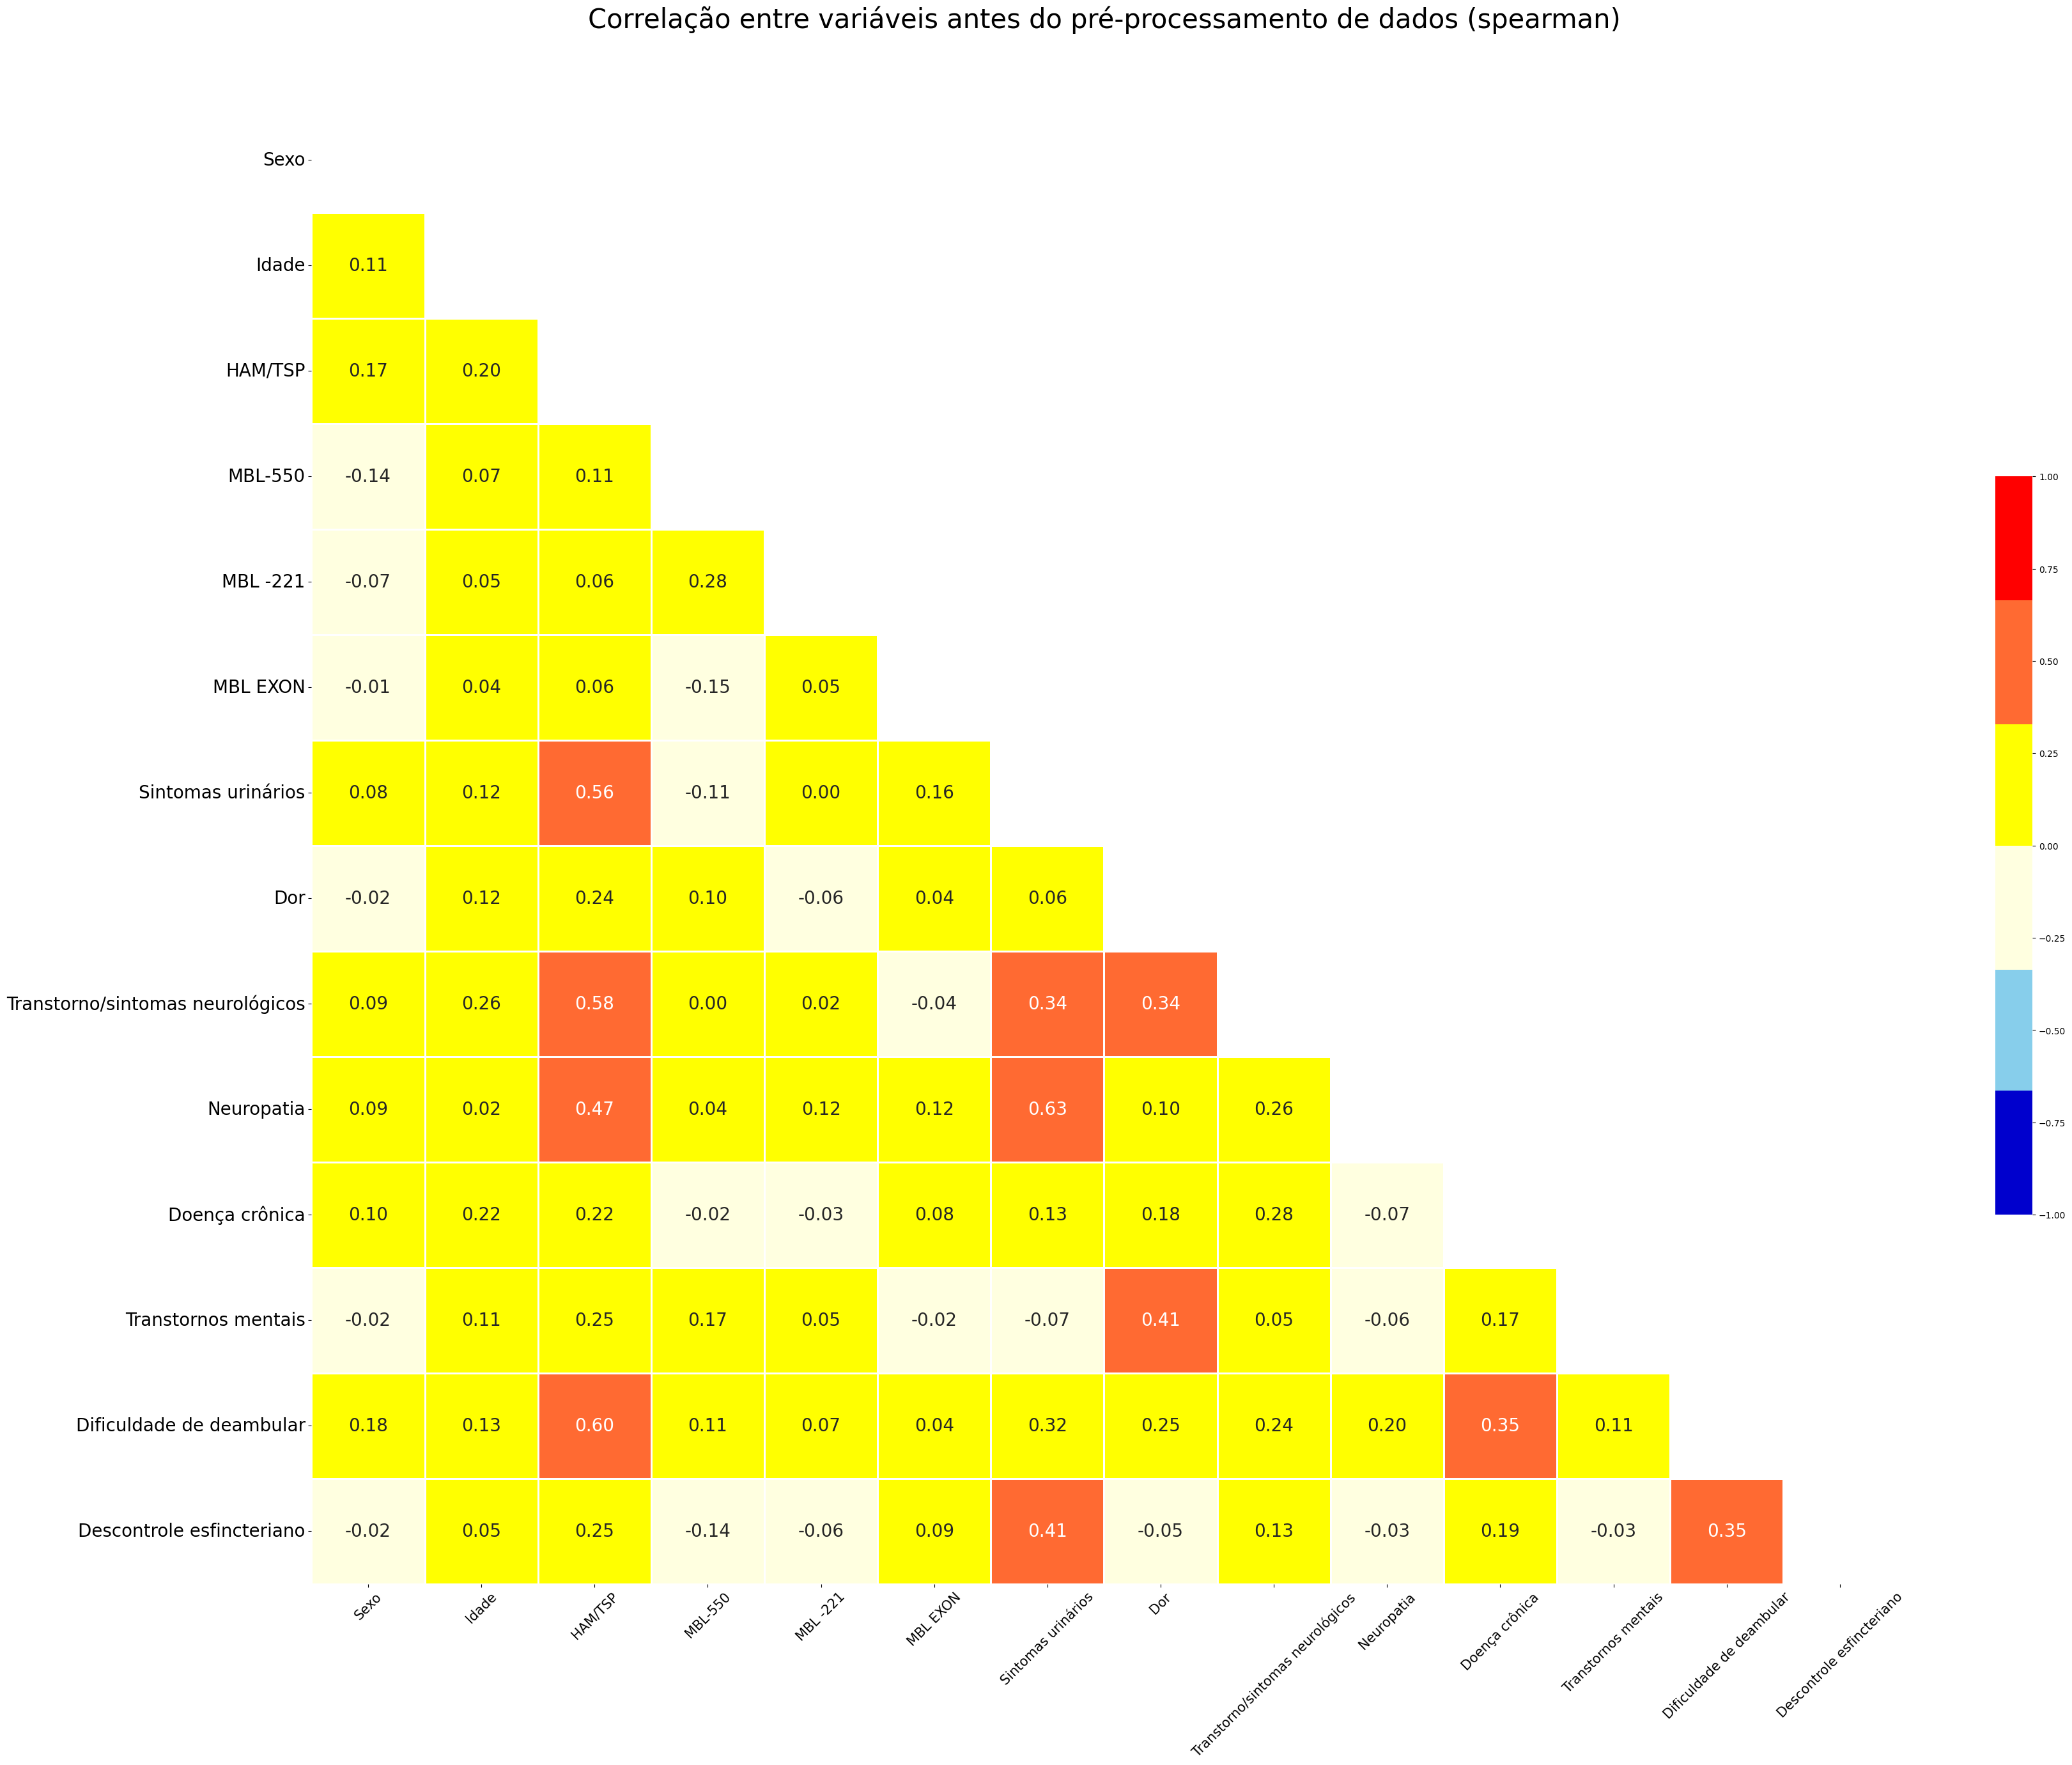

In [ ]:
# Correlation
mypal= ['#0000CD', '#87CEEB', '#FFFFE0','#FFFF00', '#ff6a32','#FF0000']
metodo_correlacao = "spearman"
df_ = df

corr = df_.corr(method= metodo_correlacao)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(40, 30), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=1, cbar_kws={"shrink": 0.5}, fmt='.2f', annot_kws={"size": 20})
plt.yticks(rotation=0, fontsize=20)
plt.xticks(rotation=45, fontsize=15)
ax.set_title("Correlação entre variáveis antes do pré-processamento de dados ("+metodo_correlacao+")", fontsize=30, y= 1.05);


# Save the graphic in PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Exploratory Analysis/' + 'initial_df_plot_heatmap_corr_pearson.pdf')

plt.show()

# **Linear regression**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
y = df['HAM/TSP']  # Variável alvo
X = df.drop('HAM/TSP', axis=1)  # Variáveis preditoras
# Supondo que você tenha um DataFrame df com suas variáveis independentes
# X = df.drop('HAM/TSP', axis=1)  # Variáveis independentes
# y = df['HAM/TSP']  # Variável dependente

# Adicione uma constante ao DataFrame X para ajustar o intercepto no modelo
X = sm.add_constant(X)

# Ajuste o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Obter os valores-p para cada variável independente
p_values = model.pvalues

print(p_values)



const                               4.196423e-01
Sexo                                4.605391e-01
Idade                               6.676310e-01
MBL-550                             2.210987e-01
MBL -221                            2.986389e-01
MBL EXON                            5.100887e-01
Sintomas urinários                  4.958241e-02
Dor                                 1.135505e-01
Transtorno/sintomas neurológicos    5.687853e-14
Neuropatia                          4.655148e-07
Doença crônica                      4.693658e-02
Transtornos mentais                 2.895299e-04
Dificuldade de deambular            5.051066e-10
Descontrole esfincteriano           8.419800e-01
dtype: float64


In [ ]:
# Count the total number of patients with HAM/TSP in relation to DataFrame 'y'
pacientes_com_HAM_feminino = ((df['Sexo'] == 1) & (df['HAM/TSP'] == 1)).sum()
print(f'Pacientes do sexo Feminino com HAM/TSP: {pacientes_com_HAM_feminino}')

# Count the total number of male patients without HAM/TSP
pacientes_com_HAM_masculino = ((df['Sexo'] == 0) & (df['HAM/TSP'] == 1)).sum()
print(f'Pacientes do sexo Masculino com HAM/TSP: {pacientes_com_HAM_masculino}')

# Count the total number of female patients without HAM/TSP
pacientes_sem_HAM_feminino = ((df['Sexo'] == 1) & (df['HAM/TSP'] == 0)).sum()
print(f'Pacientes do sexo Feminino sem HAM/TSP: {pacientes_sem_HAM_feminino}')

# Count the total number of male patients without HAM/TSP
pacientes_sem_HAM_masculino = ((df['Sexo'] == 0) & (df['HAM/TSP'] == 0)).sum()
print(f'Pacientes do sexo Masculino sem HAM/TSP: {pacientes_sem_HAM_masculino}')

Pacientes do sexo Feminino com HAM/TSP: 21
Pacientes do sexo Masculino com HAM/TSP: 6
Pacientes do sexo Feminino sem HAM/TSP: 71
Pacientes do sexo Masculino sem HAM/TSP: 55


In [ ]:
print(df)

# **T-student**
Evaluation of the relationship between the independent variables and the target outcome


In [ ]:
import shutil
import os
from scipy.stats import ttest_ind

# Define as variáveis alvo e preditoras
y = df['HAM/TSP']  # Variável alvo
X = df.drop('HAM/TSP', axis=1)  # Variáveis preditoras

# Lista para armazenar as características que passam no teste t
selected_features_ttest = []

# Iterar através das colunas
for feature in X.columns:
    # Extrair dados para cada classe
    class_0 = df.loc[df['HAM/TSP'] == 0, feature]
    class_1 = df.loc[df['HAM/TSP'] == 1, feature]

    # Realizar o teste t
    _, p_value = ttest_ind(class_0, class_1)

    # Se o valor p for menor que um limite (por exemplo, 0.05), considerar a característica significativa
    if p_value < 0.05:
        selected_features_ttest.append(feature)

# DataFrame apenas com as características selecionadas pelo teste t
X_selected = X[selected_features_ttest]

# Diretório de destino
destination_dir = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Exploratory Analysis/'

print(f'Out of {len(X.columns)} features, {len(selected_features_ttest)} were selected by the t-test: ')
with open('T-student_exploratory_Analysis.txt', 'w') as arquivo:
    for feature in selected_features_ttest:
        print(f'- {feature}', file=arquivo)

# Copiar o arquivo para o diretório de destino
shutil.copyfile('T-student_exploratory_Analysis.txt', os.path.join(destination_dir, 'T-student_exploratory_Analysis.txt'))


Out of 13 features, 10 were selected by the t-test: 


'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Exploratory Analysis/T-student_exploratory_Analysis.txt'

# **List of ML packages that we will run**

In [ ]:
y = df['HAM/TSP']  # Variável alvo
X = df.drop('HAM/TSP', axis=1)  # Variáveis preditoras

# List of ML packages that we will run
classifiers = [
    LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42),
    KNeighborsClassifier(2),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    SVC(kernel='linear', random_state=42, probability=True),
    MLPClassifier(random_state=42),
]

# Name of ML algorithms that we will use
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'SVM (RBF Kernel)',
    'Neural Network',
]

# **Data splitting and class balancing by undersampling (RandomUnderSampler)**

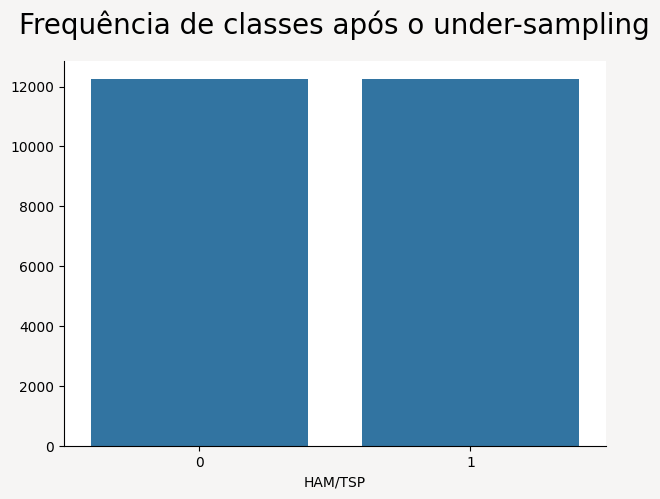

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Number of bootstrap samples
n_bootstrap_samples = 10

for item, nome in zip(classifiers, names):
# Lists to store the resampled training data
  X_train_resampled_list = []
  y_train_resampled_list = []

# Create an instance of RandomUnderSampler
  rus = RandomUnderSampler(random_state=42, replacement=True, sampling_strategy='majority')
  loo = LeaveOneOut()
# Bootstrap loop
  for _ in range(n_bootstrap_samples):
    # Sample with replacement
    X_bootstrap, y_bootstrap = resample(X, y, replace=True, random_state=42)

    # Apply RandomUnderSampler to the bootstrap sample
    X_train_resampled, y_train_resampled = rus.fit_resample(X_bootstrap, y_bootstrap)

    # Apply Leave-One-Out to the resampled data
    for train_index, test_index in loo.split(X_train_resampled):
        X_train_loo, X_test_loo = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
        y_train_loo, y_test_loo = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

        # Store resampled data
        X_train_resampled_list.append(X_train_loo)
        y_train_resampled_list.append(y_train_loo)

# Check if any data was stored
if len(X_train_resampled_list) == 0:
    print("No data stored in X_train_resampled_list. Check your sampling process.")

# Concatenate all resampled training data if data is available
if len(X_train_resampled_list) > 0:
    X_train_resampled_all = pd.concat(X_train_resampled_list)
    y_train_resampled_all = pd.concat(y_train_resampled_list)

    # Define X_test and y_test using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Train the classifier on the resampled training data
    item.fit(X_train_resampled_all, y_train_resampled_all)

    # Make predictions on the test set
    y_pred = item.predict(X_test)

    # Plot the count graph
    plt.figure(figsize=(7, 5), facecolor='#F6F5F4')
    ax = sns.countplot(x=y_train_resampled_all)
    ax.set_title('Frequência de classes após o under-sampling', fontsize=20, y=1.05)
    ax.set_ylabel('')
    sns.despine(right=True)
    plt.show()


# **Data scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Criar uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Extrair a coluna 'Idade' do DataFrame X_train_resampled e transformá-la em uma matriz bidimensional
idade_column = X_train_resampled[['Idade']]

# Ajustar o scaler aos dados e transformá-los
idade_scaled = scaler.fit_transform(idade_column)

# Criar um novo DataFrame para armazenar os dados escalados
X_train_resampled_scaled = X_train_resampled.copy()

# Substituir a coluna 'Idade' original pelos dados escalados
X_train_resampled_scaled['Idade'] = idade_scaled

# X_train_resampled_scaled agora contém apenas a coluna 'Idade' escalada, mantendo as outras colunas inalteradas


In [ ]:
#!pip uninstall scikit-learn
#!pip install --upgrade scikit-learn

In [ ]:
print(X)

     Sexo  Idade  MBL-550  MBL -221  MBL EXON  Sintomas urinários  Dor  \
0       0     68        1         0         2                   6    4   
1       1     32        0         0         1                   0    0   
2       0     54        2         1         0                   0    0   
3       0     36        1         0         0                   0    0   
4       0     41        1         1         1                   0    0   
..    ...    ...      ...       ...       ...                 ...  ...   
148     1     76        2         0         0                   0    0   
149     1     63        1         0         0                   0    2   
150     1     82        1         0         0                   0    2   
151     0     62        2         0         0                   0    1   
152     1     53        2         0         0                   0    1   

     Transtorno/sintomas neurológicos  Neuropatia  Doença crônica  \
0                                   6     

# **Feature selection**

In [ ]:
# Initialize list to store all results
all_results = []

# Test different values of "k" for SelectKBest
for k in range(1, X_train_resampled_scaled.shape[1] + 1):  # Testar de 1 até o número total de características
    # Selecionar as melhores "k" características
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = selector.transform(X_test)

    # Initialize list to store results for each classifier
    resultados = []

    # Iterate over the classifiers
    for item, nome in zip(classifiers, names):
        # Create and train the model
        item.fit(X_train_selected, y_train_resampled)

        # Making predictions
        y_pred = item.predict(X_test_selected)

        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        # Calcular sensibilidade e especificidade
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        # Calculate G-mean
        g_mean = np.sqrt(sensitivity * specificity)

        resultados.append((nome, g_mean))

    all_results.append((k, resultados))

# Create a DataFrame to store the resultss
df_results = pd.DataFrame(columns=["k"] + names)

# Add the results to the DataFrame
for k, resultados in all_results:
    g_means = [g_mean for _, g_mean in resultados]
    df_results.loc[k] = [k] + g_means

# Calculate the average of each row, excluding the first two columns
df_results["G-mean"] = df_results.iloc[:, 2:].mean(axis=1)

# Select the five lines with the highest averages
top_5_mean = df_results.nlargest(5, "G-mean")

# Create an Excel file
wb = Workbook()

# Add the first tab with the results
ws1 = wb.active
ws1.title = "Resultados"

# Add the results to Excel
for r in dataframe_to_rows(df_results, index=True, header=True):
    ws1.append(r)

# Create the second tab for the five lines with the highest averages
ws2 = wb.create_sheet(title="Top 5 Médias")

# Add the results to Excel
for r in dataframe_to_rows(top_5_mean, index=True, header=True):
    ws2.append(r)

# Iterate on the 5 best results
#top = sorted(all_results, key=lambda x: x[1], reverse=True)[:5]
for idx, (k, _) in enumerate(top_5_mean.iterrows(), start=1):
    # Create a new tab for this k value
    ws_new = wb.create_sheet(title=f"k={k}")

    # Select the variables corresponding to this value of k
    X_train_selected_k = X_train_resampled.iloc[:, :k]

    # Get the names of the selected characteristics
    selected_features = list(X_train_resampled.columns[selector.get_support()])

    # Convert the selected variables to a pandas DataFrame
    df_selected_k = pd.DataFrame(X_train_selected_k, columns=[f"Feature_{i}" for i in range(1, k+1)])

    # Add the names of the selected features as a header
    ws_new.append(selected_features)

    # Add the data to Excel
    for row in dataframe_to_rows(df_selected_k, index=False, header=True):
        ws_new.append(row)

    # Add the feature numbers below the column names
    feature_numbers = [i for i in range(1, k+1)]
    ws_new.append(feature_numbers)

# File name
feature_selection = "resultados_feature_selection.xlsx"

# Save the Excel file
wb.save(feature_selection)

# Target directory in Google Drive
destination_dir = "/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Feature selection/"

# Copy the file to the destination directory, overwriting if it already exists
shutil.copyfile(feature_selection, os.path.join(destination_dir, feature_selection))

'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Feature selection/resultados_feature_selection.xlsx'

# **Evaluation of multicollinearity**

In [ ]:
# Adds a column of constants to the DataFrame
df_with_const = add_constant(pd.DataFrame(X_train_resampled_scaled, columns=X_train_resampled_scaled.columns))

# List for storing VIF results
vif_data = []

# Function to calculate the VIF in relation to the 'HAM/TSP' column
def calculate_vif(column_index):
    return variance_inflation_factor(df_with_const.values, column_index)

# Calculate the VIF for each variable in relation to the 'HAM/TSP' column
for i, column in enumerate(df_with_const.columns):
    if column != 'const' and column != 'HAM/TSP':
        vif = calculate_vif(i)
        vif_data.append((column, vif))

# Convert the results into a DataFrame
vif_df = pd.DataFrame(vif_data, columns=["Variable", "VIF"])

# Save the DataFrame in an Excel file
caminho_arquivo = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Feature selection/VIF_data.xlsx'
vif_df.to_excel(caminho_arquivo, index=False)

In [ ]:
print(df)

# **Pre-processing of manually selected data by feature selection**

In [ ]:
# Supondo que você já tenha um DataFrame `df` com todas as colunas
# Aqui, selecione as colunas específicas
selected_columns = ['Sexo', 'Idade'
                    'MBL-550', 'MBL -221', 'MBL EXON',
                    #'Sintomas urinários',
                    'Dor',
                    #'Transtorno/sintomas neurológicos',
                    #'Neuropatia',
                    'Doença crônica',
                    'Transtornos mentais',
                    #'Dificuldade de deambular',
                    #'Descontrole esfincteriano'
]
x_ = X_train_resampled_scaled[selected_columns]

# Verificando as primeiras linhas do novo DataFrame
x_.head()

# Define as variáveis alvo e preditoras
X = x_
y = y_train_resampled

In [ ]:
print(X)

    Sexo     Idade  Sintomas urinários  Transtorno/sintomas neurológicos  \
0      1  0.666667                   0                                 0   
1      1  0.333333                   0                                 0   
2      0  0.023810                   0                                 0   
3      1  0.023810                   0                                 0   
4      1  0.333333                   0                                 0   
5      1  0.571429                   0                                 0   
6      0  0.547619                   0                                 0   
7      1  0.285714                   0                                 0   
8      1  0.666667                   0                                 0   
9      0  0.547619                   0                                 0   
10     0  0.214286                   0                                 0   
11     1  0.190476                   0                                 0   
12     0  0.

#**F1-metrics + ROC Curve + Mean AUC for default hyperparameters**


Modelo: Logistic Regression
Média da precisão: 0.96
Media do desvio padrão: 0.07999999999999999
Média da acurácia: 0.8800000000000001
Media da taxa de recall: 0.8
Media do parâmetro f1: 0.8655555555555555

Modelo: Nearest Neighbors
Média da precisão: 0.9666666666666666
Media do desvio padrão: 0.06666666666666665
Média da acurácia: 0.86
Media da taxa de recall: 0.76
Media do parâmetro f1: 0.804040404040404

Modelo: Decision Tree
Média da precisão: 0.8916666666666666
Media do desvio padrão: 0.14813657362192648
Média da acurácia: 0.9
Media da taxa de recall: 0.96
Media do parâmetro f1: 0.9134421134421133

Modelo: Random Forest
Média da precisão: 0.885
Media do desvio padrão: 0.15132745950421556
Média da acurácia: 0.9
Media da taxa de recall: 0.96
Media do parâmetro f1: 0.9138461538461538

Modelo: AdaBoost
Média da precisão: 0.9666666666666666
Media do desvio padrão: 0.06666666666666665
Média da acurácia: 0.9800000000000001
Media da taxa de recall: 1.0
Media do parâmetro f1: 0.981818181818

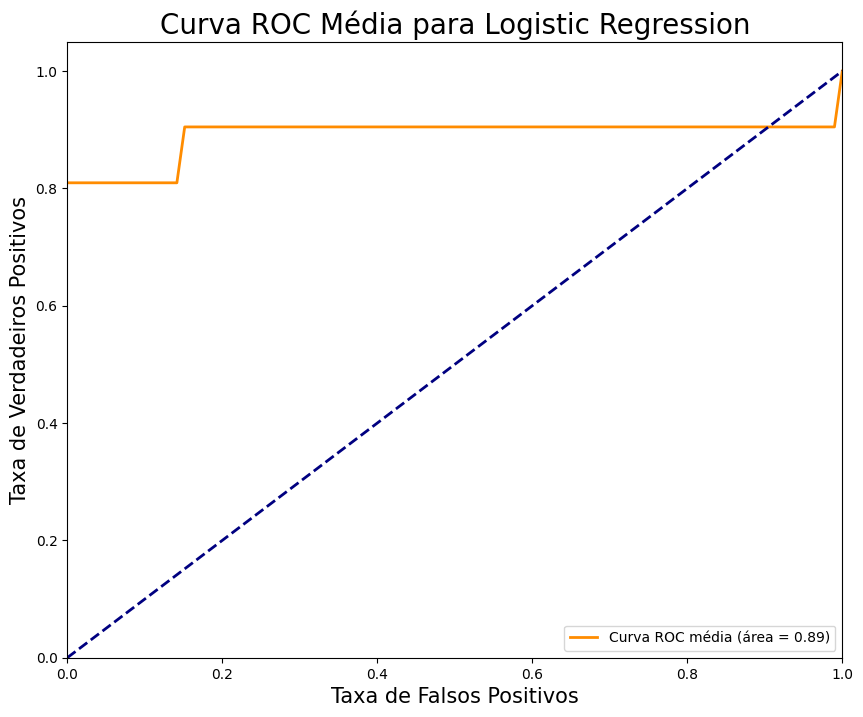

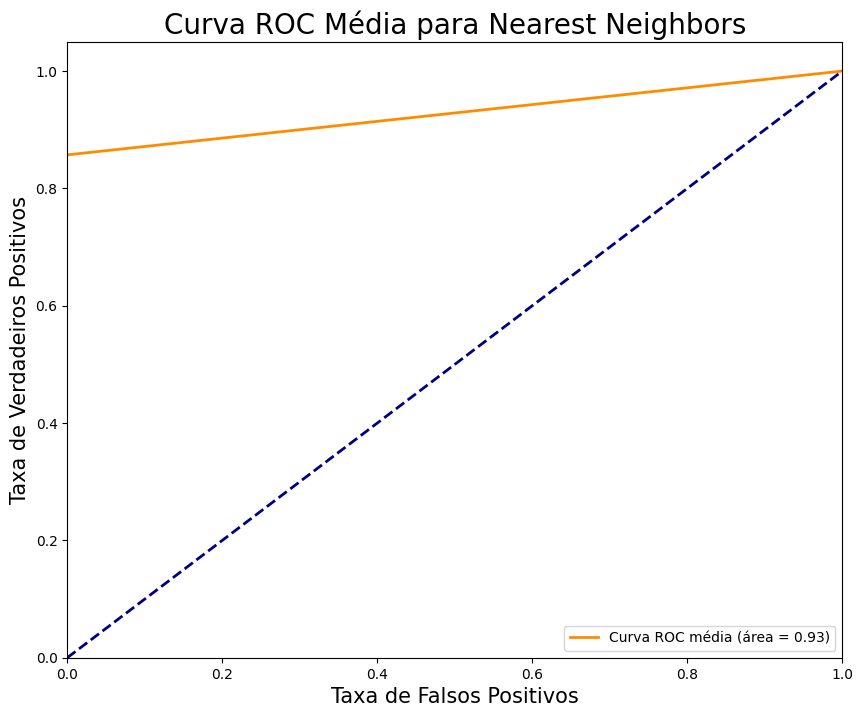

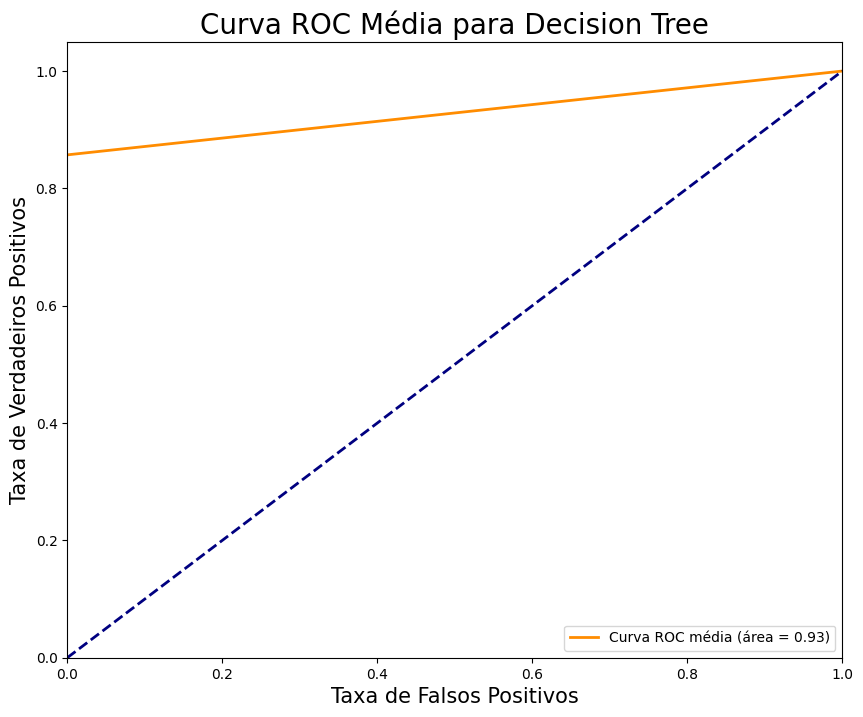

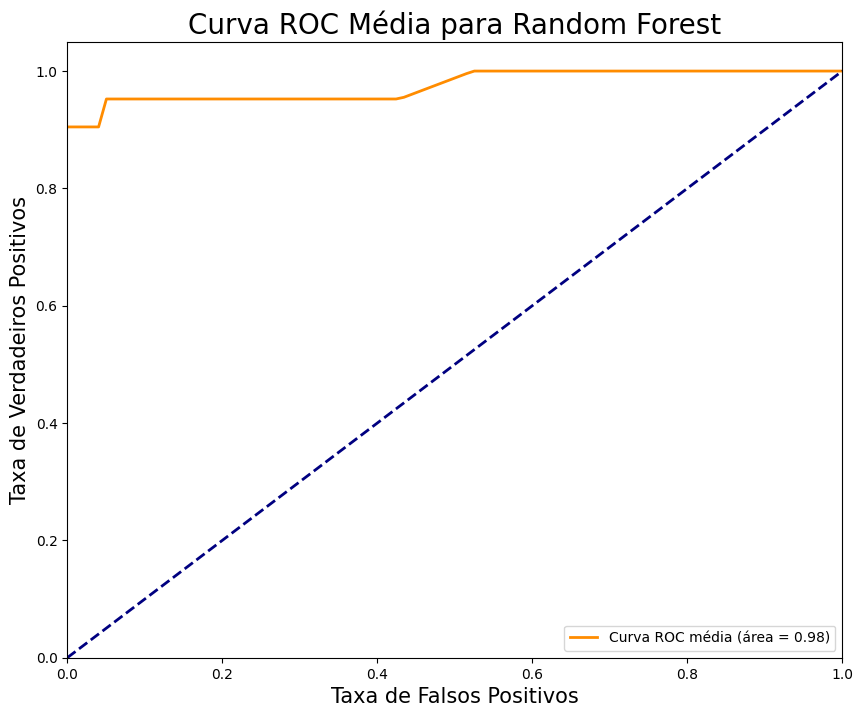

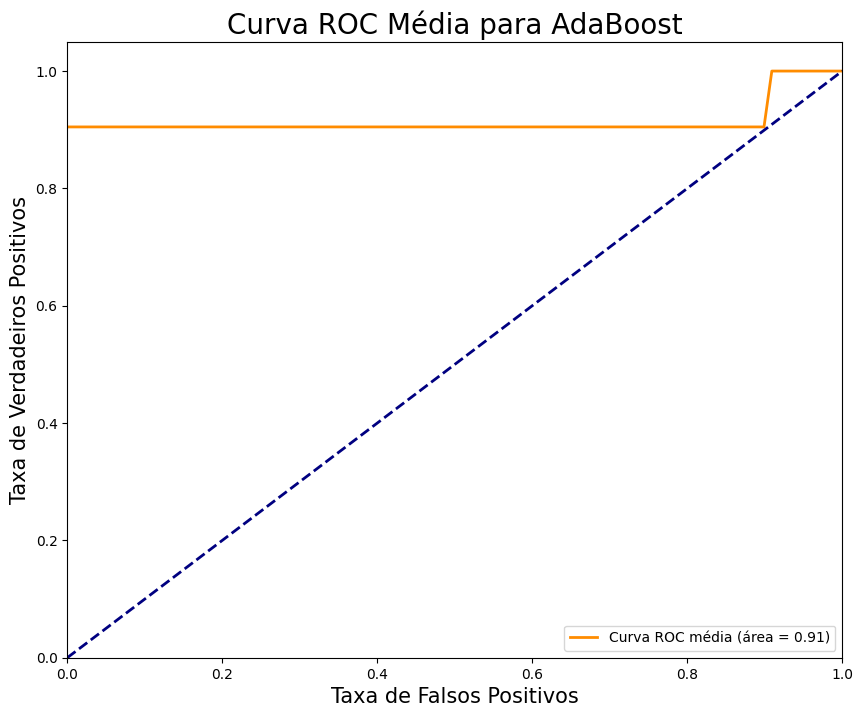

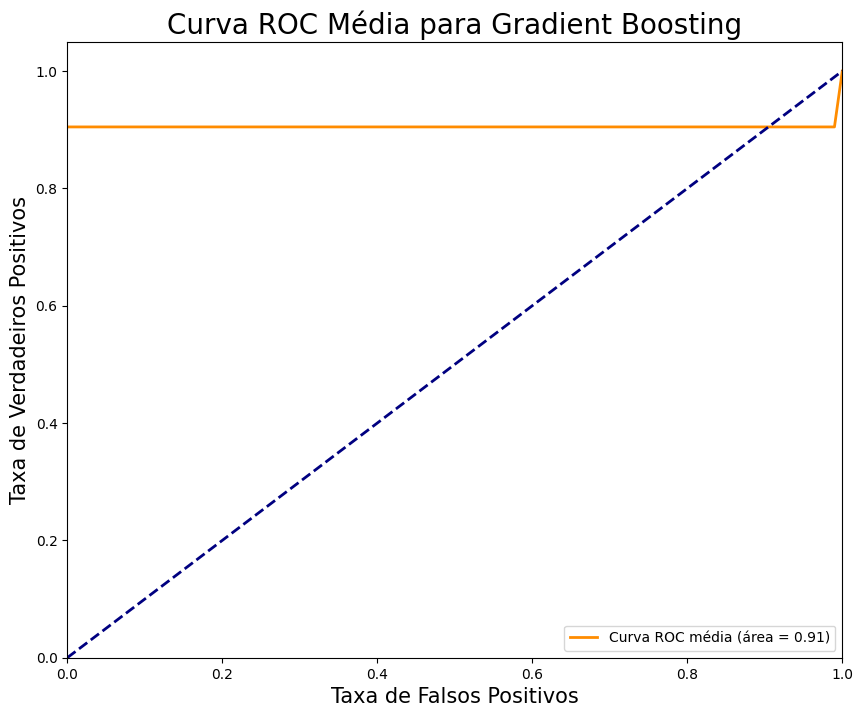

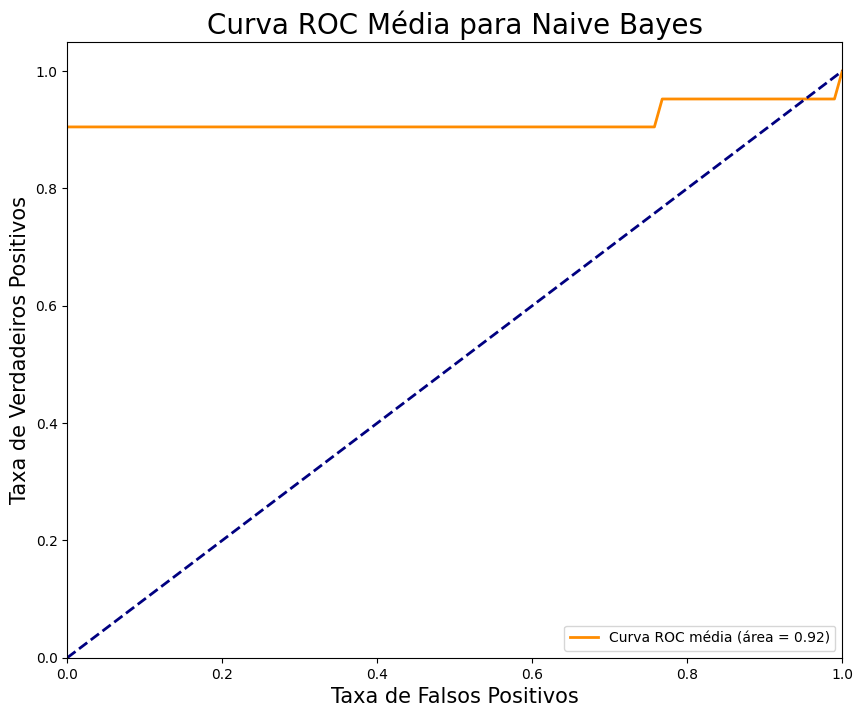

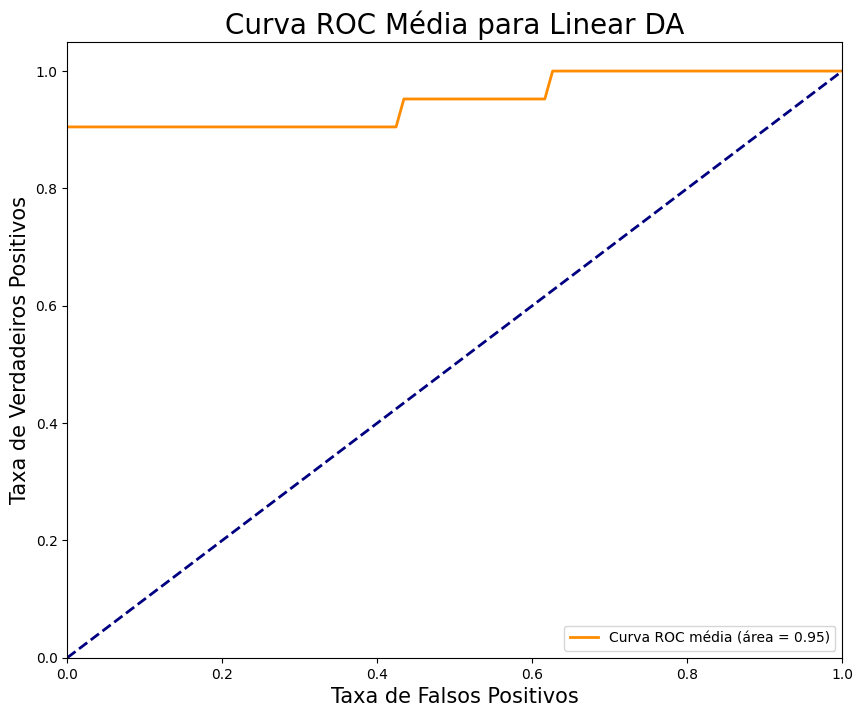

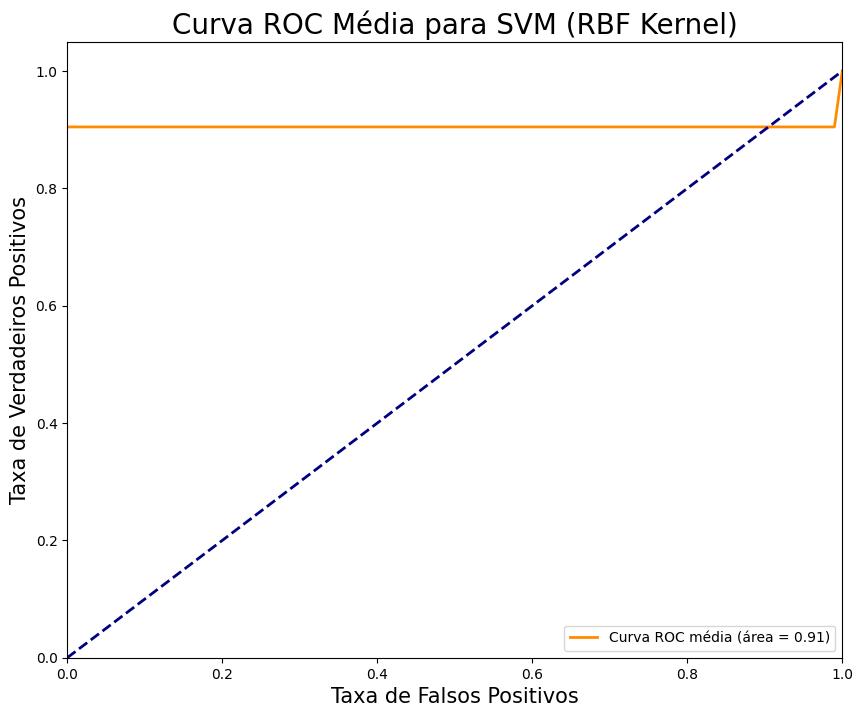

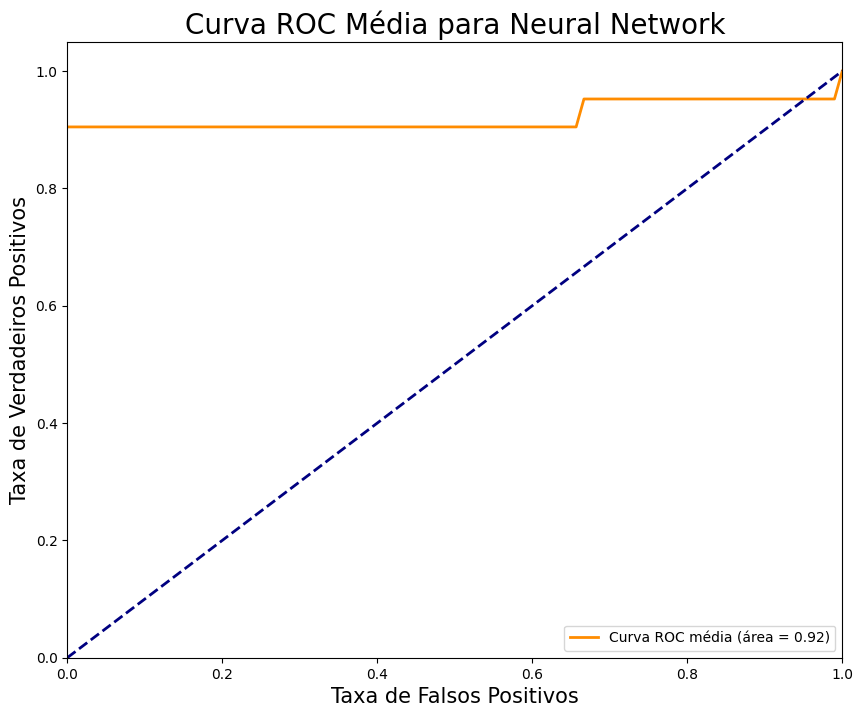

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, train_test_split, cross_val_score
from sklearn.utils import resample
from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix
import numpy as np

# Número de amostras bootstrap
n_bootstrap_samples = 10

# Clearing old data from the data_table, if the code has been run previously
data_table = pd.DataFrame()
f1_m = []

for item, nome in zip(classifiers, names):
    # Lists to store the resampled training data
    X_train_resampled_list = []
    y_train_resampled_list = []

    # Create an instance of RandomUnderSampler
    rus = RandomUnderSampler(random_state=42, replacement=True, sampling_strategy='majority')
    loo = LeaveOneOut()

    # Lists to store ROC curves data
    all_fpr = []
    all_tpr = []
    all_roc_auc = []

    # Bootstrap loop
    for _ in range(n_bootstrap_samples):
        # Sample with replacement
        X_bootstrap, y_bootstrap = resample(X, y, replace=True, random_state=42)

        # Apply RandomUnderSampler to the bootstrap sample
        X_train_resampled, y_train_resampled = rus.fit_resample(X_bootstrap, y_bootstrap)

        # Store true labels and predicted probabilities
        y_test_all = []
        y_pred_proba_all = []

        # Apply Leave-One-Out to the resampled data
        for train_index, test_index in loo.split(X_train_resampled):
            X_train_loo, X_test_loo = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
            y_train_loo, y_test_loo = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

            # Train the classifier on the resampled training data
            item.fit(X_train_loo, y_train_loo)

            # Make predictions on the leave-one-out test set
            y_pred_proba_loo = item.predict_proba(X_test_loo)[:, 1]

            # Store the true labels and predicted probabilities
            y_test_all.extend(y_test_loo)
            y_pred_proba_all.extend(y_pred_proba_loo)

        # Calculate ROC curve and AUC for this bootstrap sample
        fpr, tpr, _ = roc_curve(y_test_all, y_pred_proba_all)
        roc_auc = auc(fpr, tpr)

        all_fpr.append(fpr)
        all_tpr.append(tpr)
        all_roc_auc.append(roc_auc)

    # Calculate mean ROC curve
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.mean([np.interp(mean_fpr, f, t) for f, t in zip(all_fpr, all_tpr)], axis=0)
    mean_roc_auc = auc(mean_fpr, mean_tpr)

    plt.figure(figsize=(10, 8))
    plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label=f'Curva ROC média (área = {mean_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos', fontsize=15)
    plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=15)
    plt.title(f'Curva ROC Média para {nome}', fontsize=20)
    plt.legend(loc="lower right")
    plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/ROC Curve/' + 'Curva ROC Média ' + nome + '.jpeg')

    # Calculation and print of F1 and associated metrics
    precision_mean_score = cross_val_score(item, X, y, scoring="precision", cv=5).mean()
    std_score = cross_val_score(item, X, y, scoring="precision", cv=5).std()
    accuracy_mean_score = cross_val_score(item, X, y, scoring="accuracy", cv=5).mean()
    recall_mean_score = cross_val_score(item, X, y, scoring="recall", cv=5).mean()
    f1_mean_score = cross_val_score(item, X, y, scoring="f1", cv=5).mean()

    print(f"Modelo: {nome}")
    print(f"Média da precisão: {precision_mean_score}")
    print(f"Media do desvio padrão: {std_score}")
    print(f"Média da acurácia: {accuracy_mean_score}")
    print(f"Media da taxa de recall: {recall_mean_score}")
    print(f"Media do parâmetro f1: {f1_mean_score}")
    print()

    # Creating the data frames that values to be saved
    results_mean_precision = pd.DataFrame({'Precision Mean': [precision_mean_score]})
    results_mean_accuracy = pd.DataFrame({'Accuracy Mean': [accuracy_mean_score]})
    results_mean_recall = pd.DataFrame({'Recall Mean': [recall_mean_score]})
    results_mean_f1 = pd.DataFrame({'F1 Mean': [f1_mean_score]})

    # Creating the data frames (with the values of interest) that will be plotted in text file
    f1_metrics = pd.DataFrame(
    [{
        "Nome": nome,
        "Accuracy": results_mean_accuracy.iloc[0]['Accuracy Mean'],
        "Recall": results_mean_recall.iloc[0]['Recall Mean'],
        "Precision": results_mean_precision.iloc[0]['Precision Mean'],
        "F1 Score": results_mean_f1.iloc[0]['F1 Mean'],
    }]
)
    f1_m.append(f1_metrics)
    data_table = pd.concat(f1_m, ignore_index=True)
data_table = np.round(data_table.reset_index(drop=True), 2)

# Aesthetic transformation similar to a heatmap
styled_table = data_table.sort_values(by='Accuracy', ascending=False)\
      .style.background_gradient(cmap='coolwarm')\
      .bar(subset=['Recall'], color='#ff355d')\
      .bar(subset=['Precision'], color='lightseagreen')\
      .bar(subset=['F1 Score'], color='gold')

# Save the generated excel file (optional)
styled_table.to_excel('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/F1 Metrics/F1_Metrics.xlsx', engine='openpyxl')


# **Learning curves analysis**

**Performance Learning Curves:**

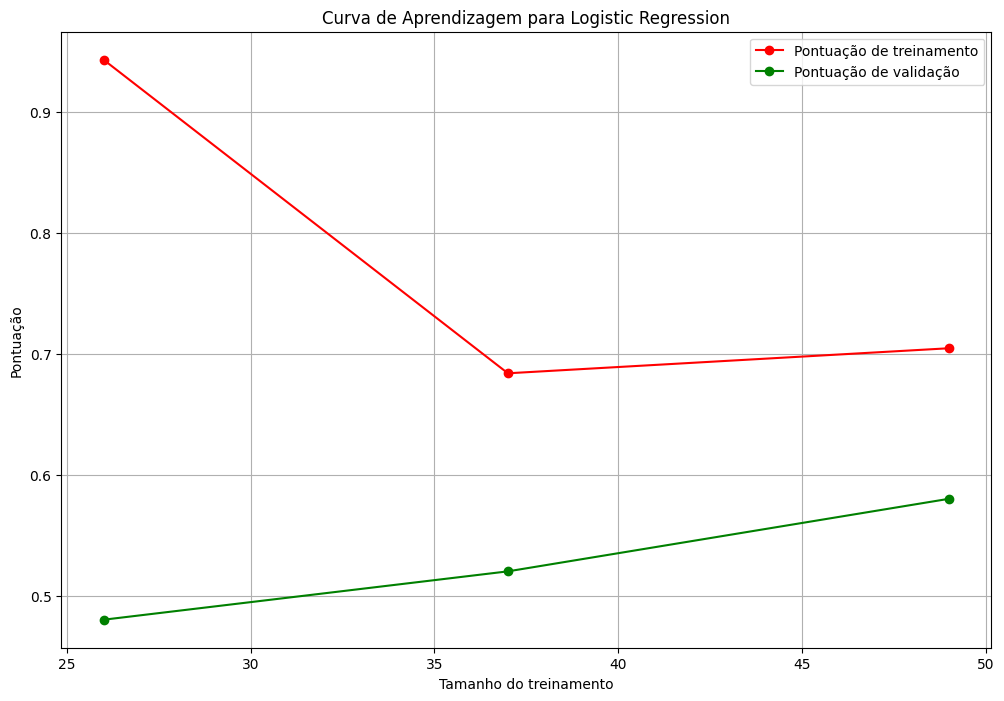

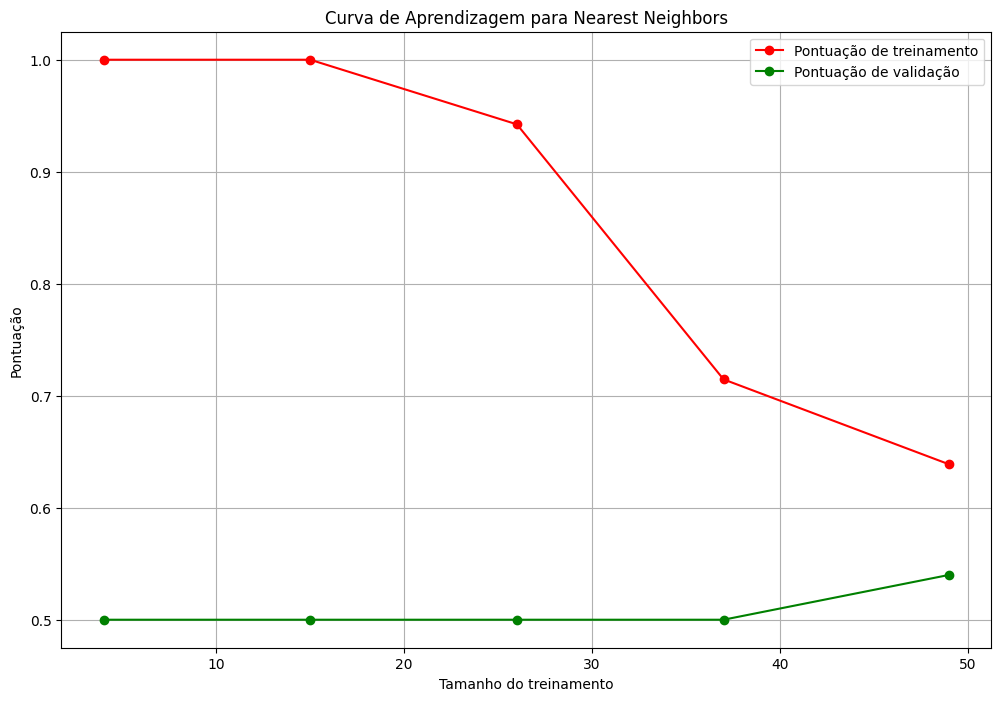

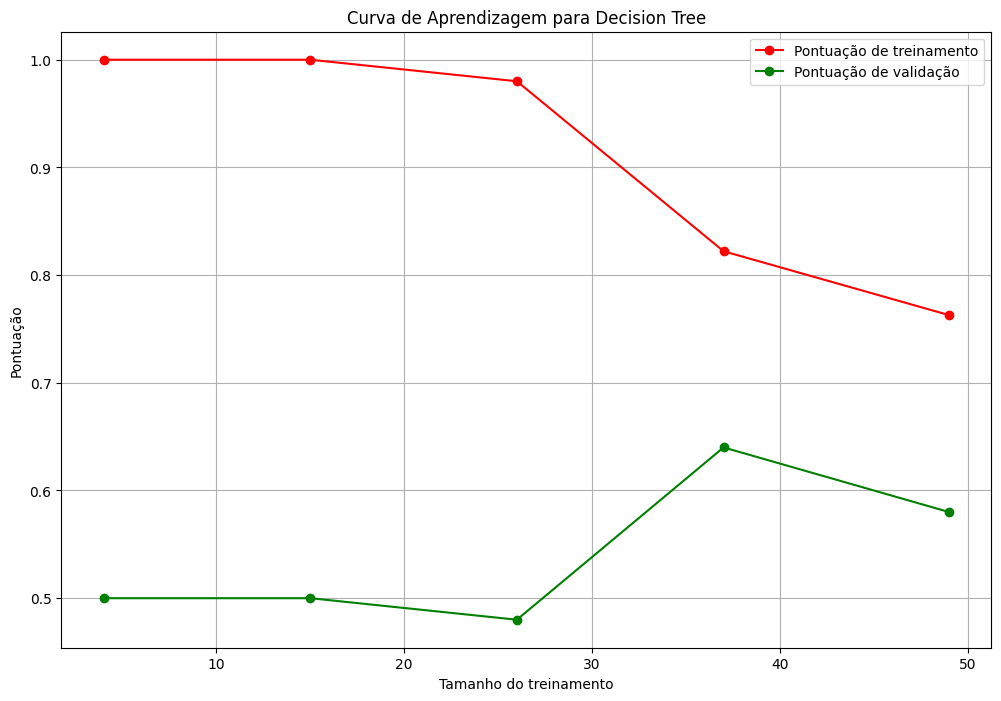

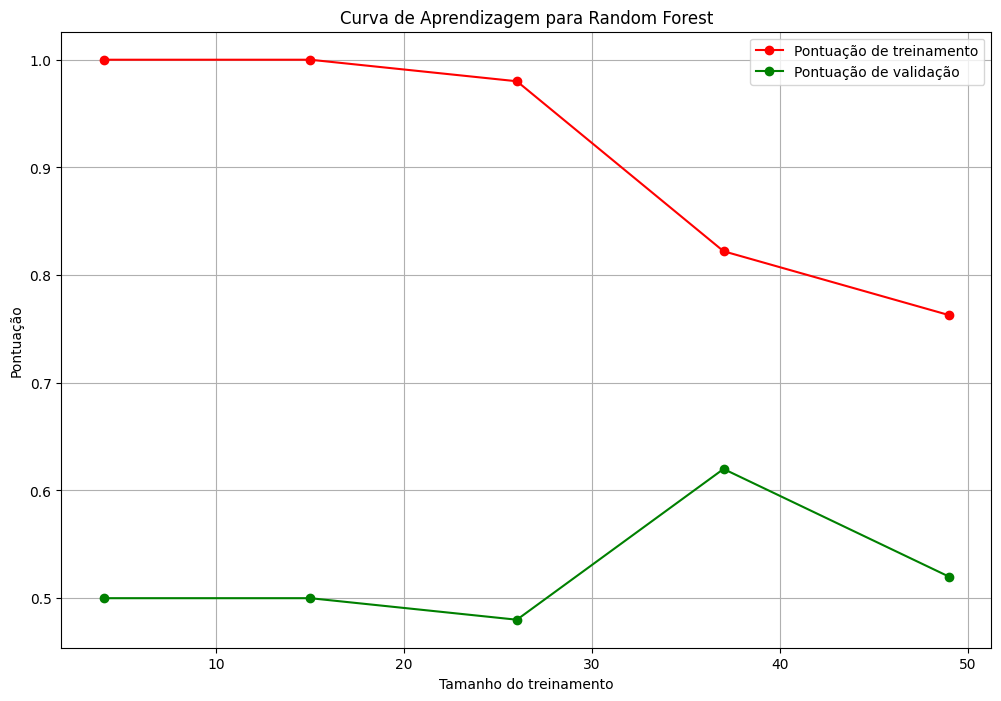

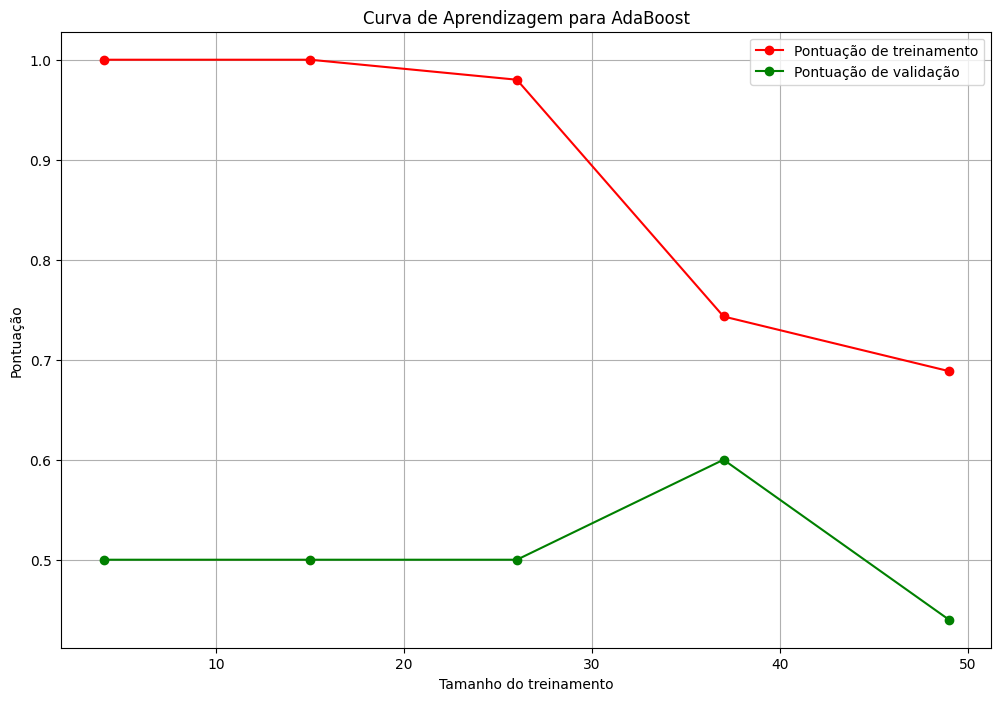

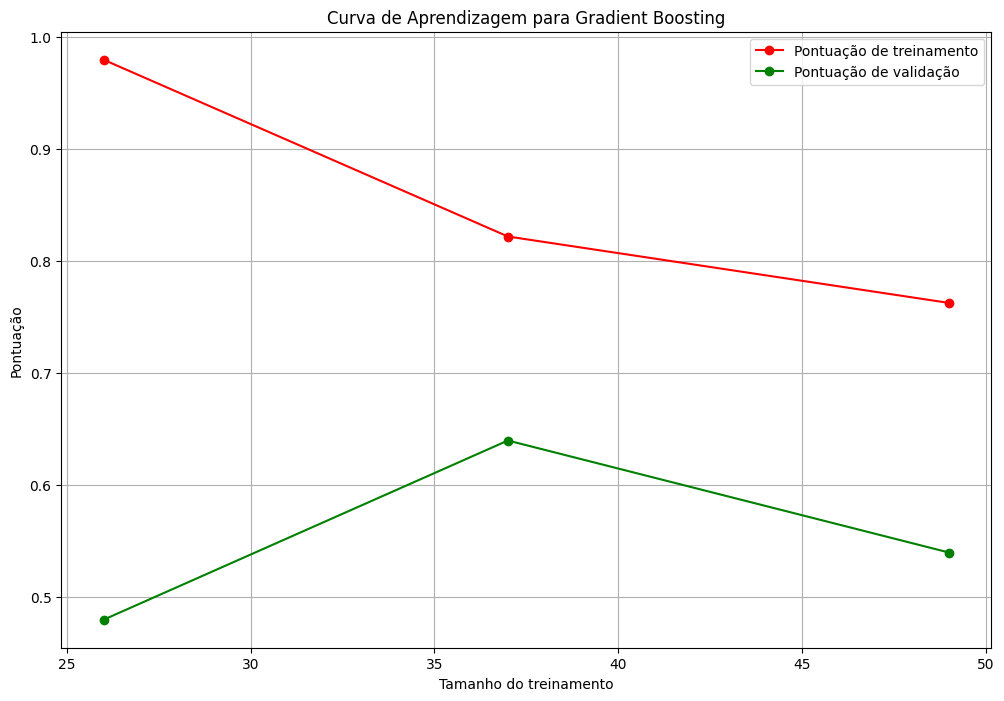

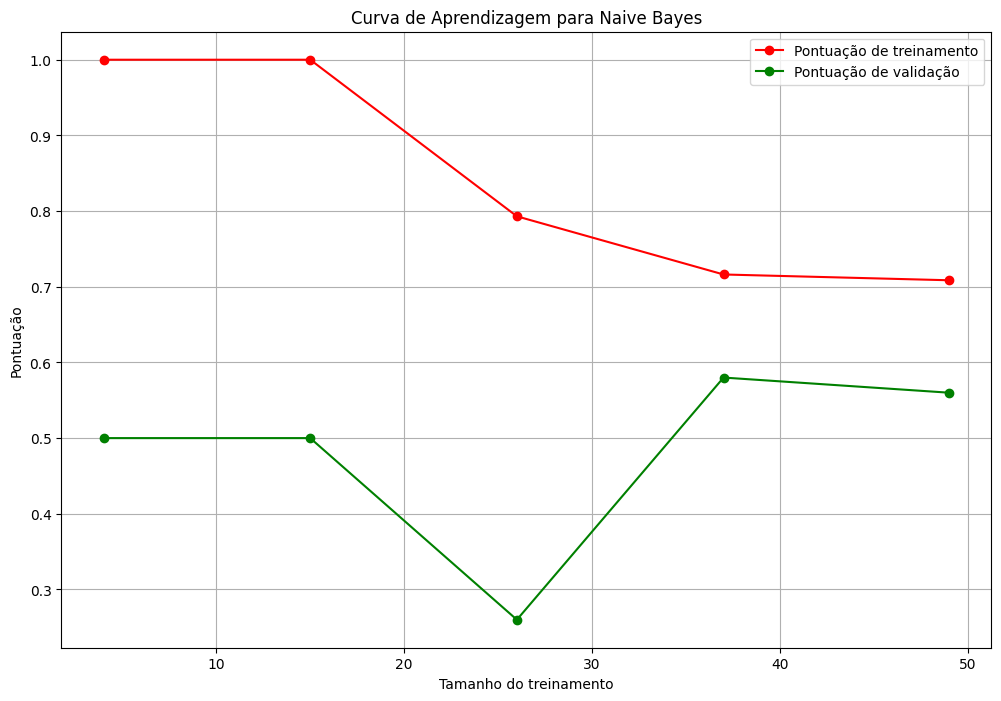

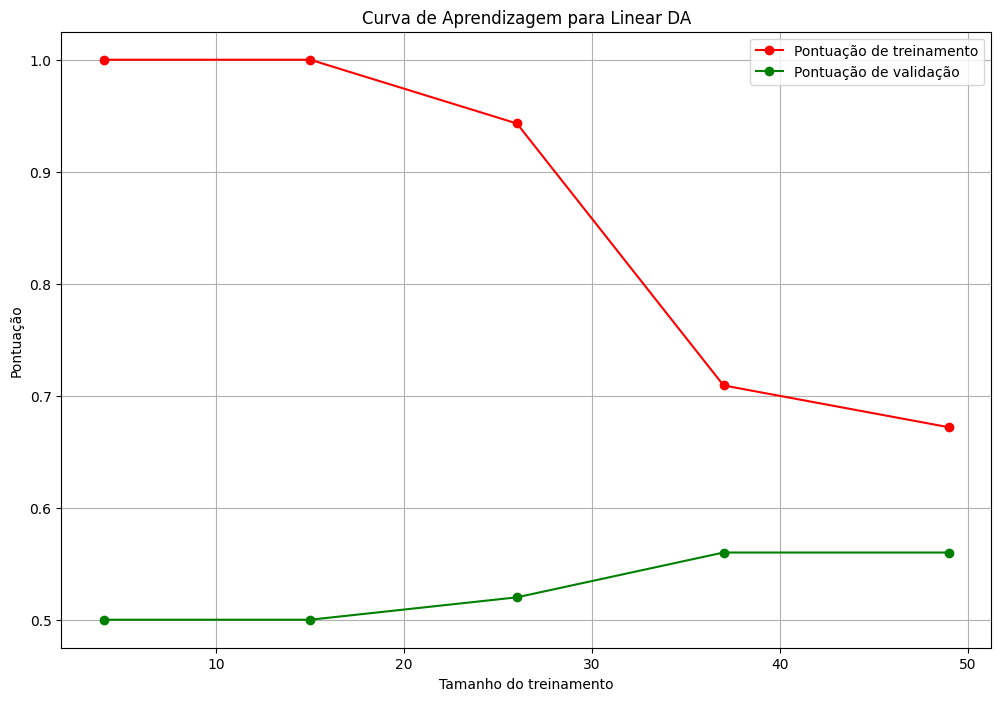

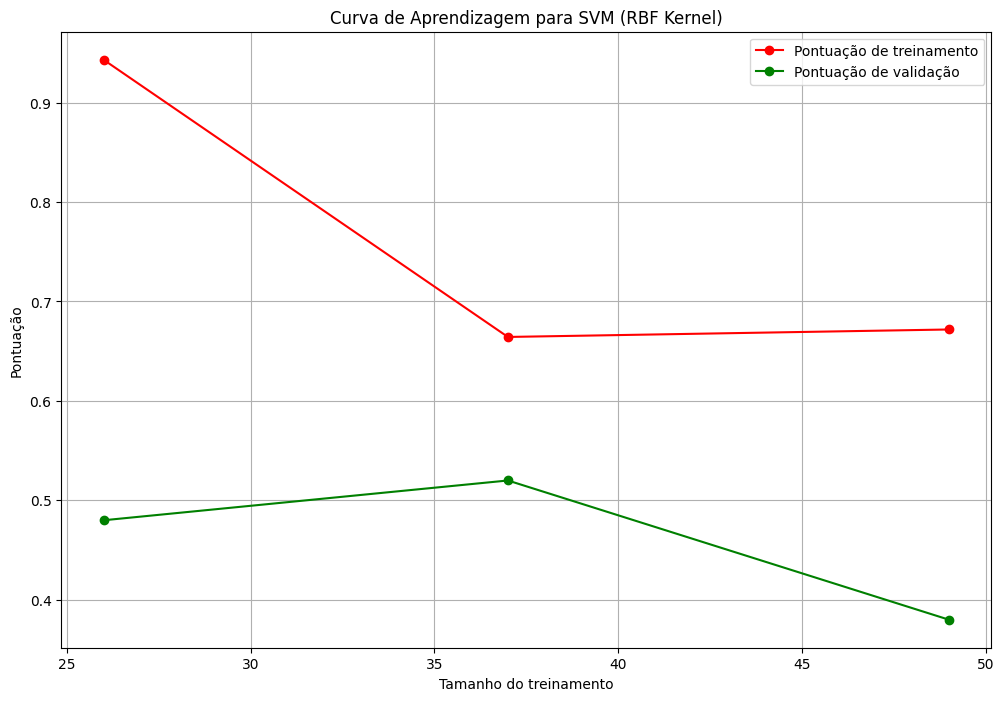

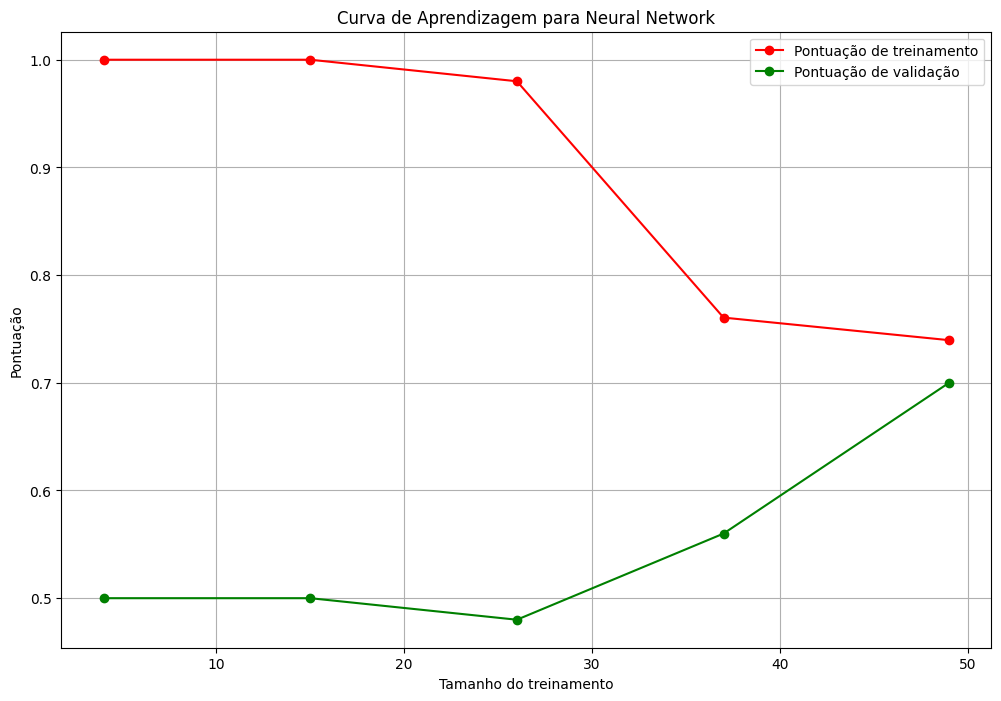

In [ ]:
# Iterar sobre cada classificador e plotar a curva de aprendizagem com Leave-One-Out
for item, nome in zip(classifiers, names):
    plt.figure(figsize=(12, 8))
    plt.title(f'Curva de Aprendizagem para {nome}')
    plt.xlabel("Tamanho do treinamento")
    plt.ylabel("Pontuação")

    # Usar Leave-One-Out para calcular as pontuações de treinamento e validação
    train_sizes, train_scores, test_scores = learning_curve(item, X, y, cv=loo, train_sizes=np.linspace(.1, 1.0, 5))

    # Calcular as médias e desvios padrão das pontuações de treinamento e validação
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plotar as curvas de aprendizado com intervalo de confiança
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Pontuação de treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Pontuação de validação")
    plt.legend(loc="best")
    plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Learning curve/Learning_curve_{nome}.jpeg')
    plt.show()


# **Confunsion matrix**



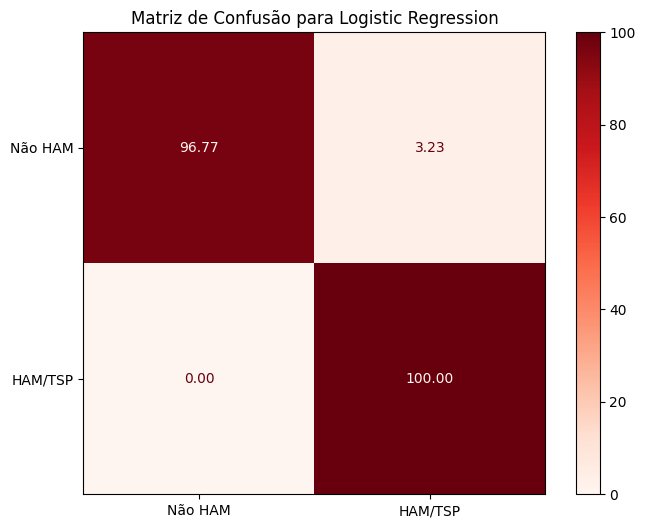

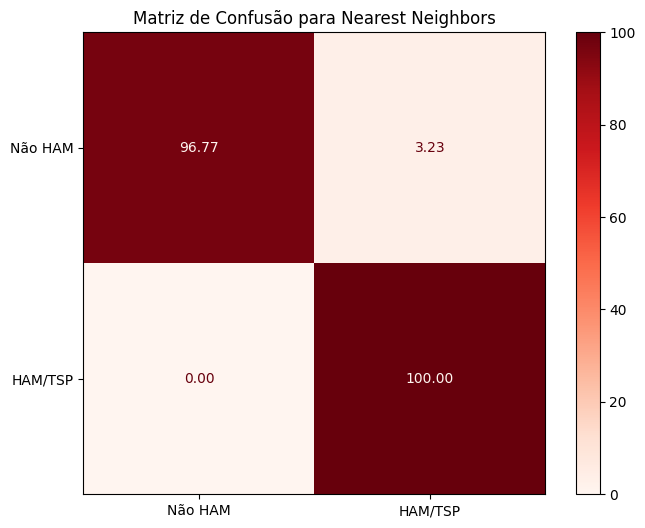

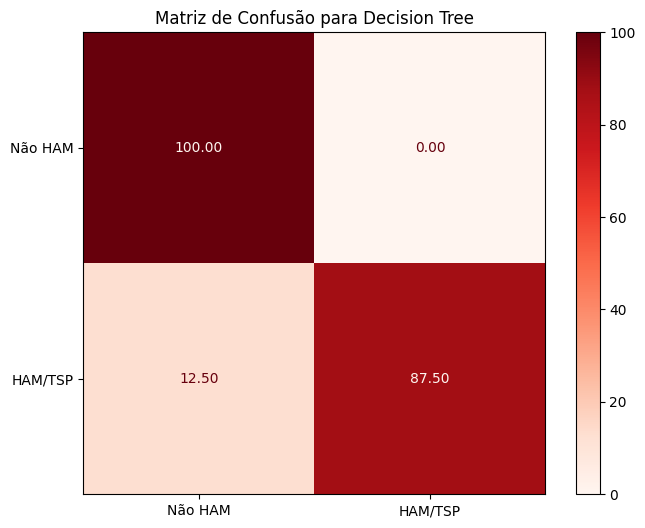

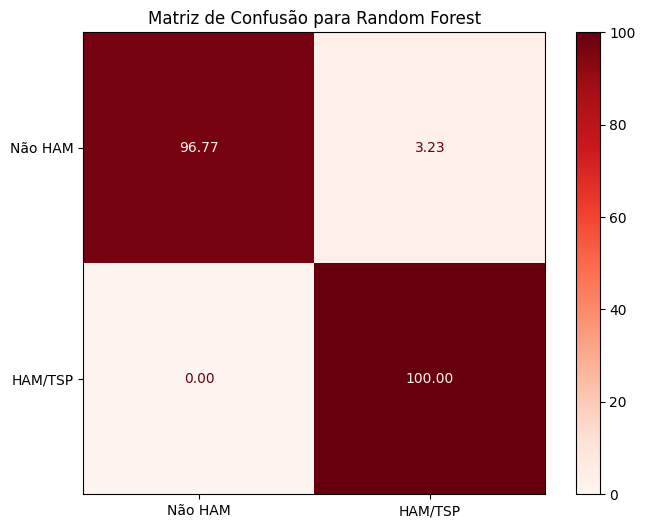

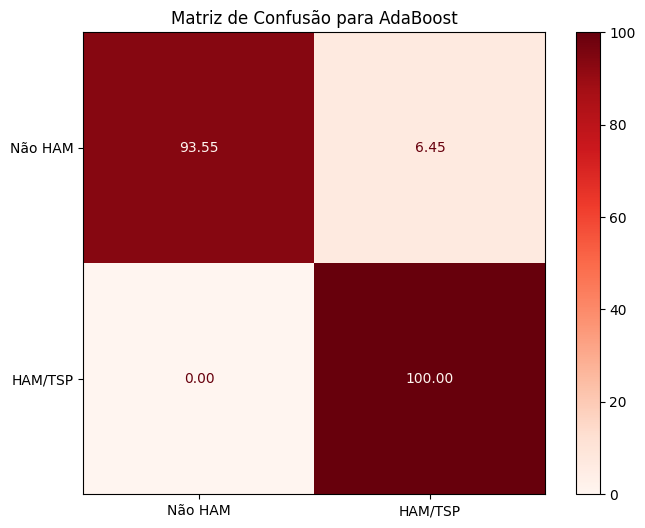

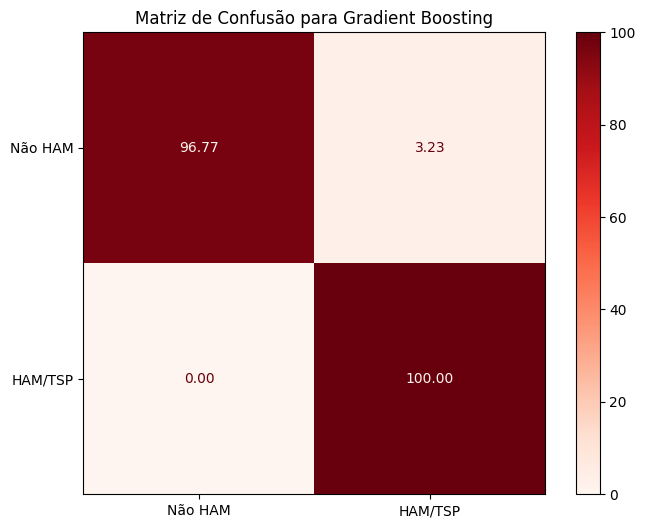

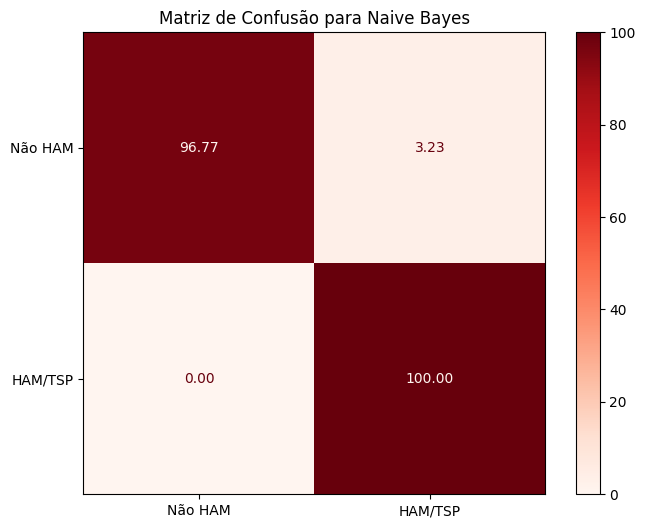

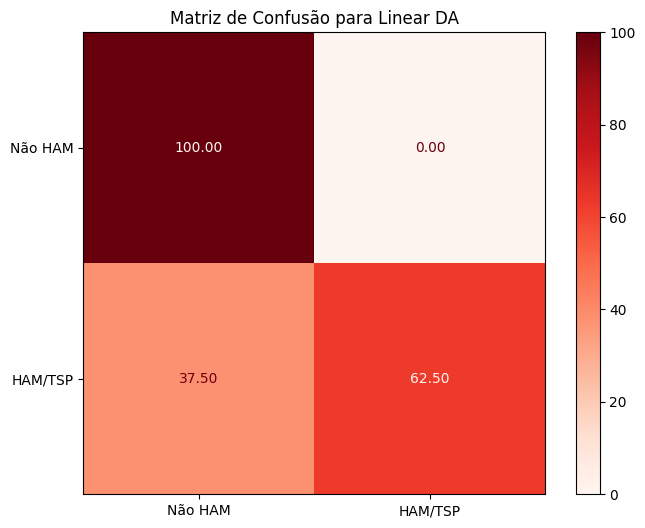

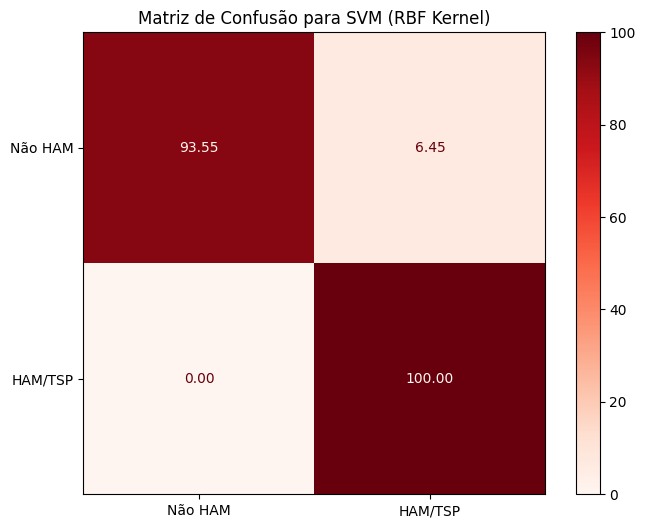

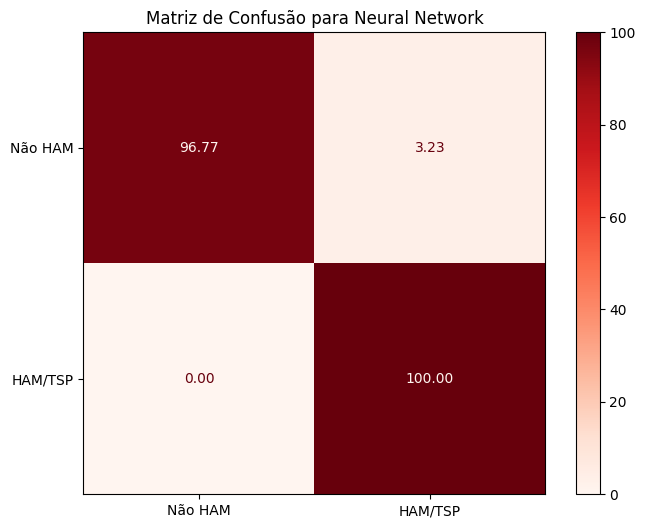

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Iterar sobre cada classificador e exibir a matriz de confusão
for item, nome in zip(classifiers, names):
    # Treinar novamente o classificador
    item.fit(X_train_resampled_all, y_train_resampled_all)

    # Fazer previsões no conjunto de teste
    y_pred = item.predict(X_test)

    # Calcular a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Converter a matriz de confusão em porcentagens
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plotar a matriz de confusão com cmap vermelho e porcentagens
    disp = ConfusionMatrixDisplay(cm_percentage, display_labels=["Não HAM", "HAM/TSP"])

    # Plotting with a custom cmap and displaying values as percentages
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap="Reds", ax=ax, values_format='.2f')
    ax.set_title(f'Matriz de Confusão para {nome}')

    # Remover os títulos dos eixos
    ax.set_xlabel('')
    ax.set_ylabel('')

    #Save figures
    plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Confunsion matrix/Confusion matrix_{nome}.jpeg')
    plt.show()

In [ ]:
import statsmodels.api as sm

# Adicionar uma coluna de intercepto aos dados de treinamento
X_train = sm.add_constant(X_train)

# Criar e ajustar o modelo de regressão linear usando statsmodels
model_sm = sm.OLS(y_train, X_train)
results = model_sm.fit()

# Imprimir o sumário do modelo
print(results.summary())


NameError: name 'X_train' is not defined